In [4]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [ ]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23,94.0,28.1,0.167,21.0
4,0.0,NaN,40.0,35,NaN,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,NaN,101.0,76.0,48,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0,0.0,30.1,0.349,47.0


In [2]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls


NameError: name 'df' is not defined

In [3]:
df.describe()

NameError: name 'df' is not defined

<AxesSubplot:>

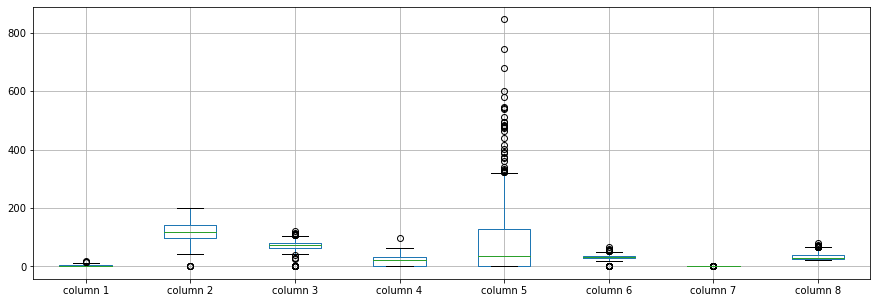

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.846457
column 2    120.894531
column 3     69.144928
column 4     20.600000
column 5     80.316273
column 6     31.960714
column 7      0.471799
column 8     33.203412
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.126677,0.134372,-0.082638,-0.072802,0.017321,-0.028048,0.541052
column 2,0.126677,1.000000,0.150369,0.059185,0.334767,0.222223,0.135080,0.263549
column 3,0.134372,0.150369,1.000000,0.207120,0.089914,0.277567,0.053501,0.235697
column 4,-0.082638,0.059185,0.207120,1.000000,0.440056,0.386268,0.179073,-0.117582
column 5,-0.072802,0.334767,0.089914,0.440056,1.000000,0.190305,0.177058,-0.042287
column 6,0.017321,0.222223,0.277567,0.386268,0.190305,1.000000,0.139418,0.033547
column 7,-0.028048,0.135080,0.053501,0.179073,0.177058,0.139418,1.000000,0.028578
column 8,0.541052,0.263549,0.235697,-0.117582,-0.042287,0.033547,0.028578,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [8,8+18,8+18+18,8+18+18+18,8+18+18+18+18,8+18+18+18+18+18,8+18+18+18+18+18+18,8+18+18+18+18+18,8+18+18+18+18,8+18+18+18,8+18+18,8+18,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 428.0092690785726
Epoch: 1 , loss: 426.78084500630695
Epoch: 2 , loss: 425.4674580891927
Epoch: 3 , loss: 425.922061920166
Epoch: 4 , loss: 425.1769390106201
Epoch: 5 , loss: 423.7259324391683
Epoch: 6 , loss: 422.13330523173016
Epoch: 7 , loss: 418.99338785807294
Epoch: 8 , loss: 419.5705871582031
Epoch: 9 , loss: 415.345500310262
Epoch: 10 , loss: 415.15232912699383
Epoch: 11 , loss: 407.26321347554523
Epoch: 12 , loss: 402.0545069376628
Epoch: 13 , loss: 395.7085545857747
Epoch: 14 , loss: 382.3149420420329
Epoch: 15 , loss: 380.1022179921468
Epoch: 16 , loss: 368.6085548400879
Epoch: 17 , loss: 364.3349787394206
Epoch: 18 , loss: 354.77147420247394
Epoch: 19 , loss: 354.9518292744954
Epoch: 20 , loss: 340.76019287109375
Epoch: 21 , loss: 339.4724079767863
Epoch: 22 , loss: 333.64999198913574
Epoch: 23 , loss: 327.27328395843506
Epoch: 24 , loss: 323.73206329345703
Epoch: 25 , loss: 327.1805798212687

In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("PID_NG_1.xlsx", index=False, header=False)